## Data Analyst Take Home Exercise

### Exercise: 

 You are a data analyst for ASDA Groceries (Walmart's UK subsidiary, https://groceries.asda.com/), looking after the checkout customer experience. A new product manager has started at the company and she asks you to give a short report on the recent performance of the checkout and to give your recommendations on areas of opportunity/concern. You have pulled the attached data from the company’s analytics reporting tool. 

 Background on ASDA Groceries' checkout experience: 

 The company has a 4-step checkout, where every user has to go through each step in order to complete the checkout 

 Step 1 – Before You Go – a page where the user is shown a number of product recommendations based on what they have either previous bought or complementary product to those already in their cart 

 Step 2 – Book A Slot – a page where the user selects the time and day they would like their delivery. Availability and cost of slot here can vary. 

 Step 3 – Select Payment – a page where existing users can select a credit card that was previous used or where new/existing users can add a new credit card to use again an order 

 Step 4 – Order Summary – a page where users can see a summary of their order including order contents, booked slot, payment type and a breakdown of the final cost. This is where a customer places an order 

 For ease of analysis – assume no same user orders more than once in the same day 

### Task: 

  Run some analysis on the data set and present your top 5 findings to the new product manager.  Please see above User checkout experience. Assuming you can get all the data you want: 
 - What would you measure and how will you make decisions from there? 
 - What would be the top 3 metrics to define the success of the product?  
 - What would be the dashboards/report you would build to track those? 							


### Some findings
- Most attributes are positive correlated to revenue, and there is a strong positive correlation (more than 0.95) between those variables.
- Existing customers generate \$ 980157 revenue in total, and \$ 87869 for new customers.
- Desktop users generate \$ 588334 revenue in total, and \$ 479691 for mobile users.
- Home delivery generate \$ 882607 revenue in total, and \$ 185418 for store collection.
- By comparing the revenue for each checkout category, we can find that existing customers with home delivery option for both kind of devices leads to much more revenue than other categories, and desktop users gets the highest.
- After book a slot, there is the highest users loss, which is 8% for existing users and 12% for new users.
- Existing users with store collection seem to add more values (1% of total revenue) before them go carts.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
xls = pd.ExcelFile('International Data Analyst Take Home Excercise 2.xlsx')
data = pd.read_excel(xls, 'Data')
data.head(10)

,Date,Customer Type,Delivery Type,Device Type,Before You Go Unique Daily Users,Before You Go Cart Adds,Before You Go Total Revenue From Cart Adds,Book Slot Unique Daily Users,Select Payment Unique Daily Users,Order Summary Unique Daily Users,Orders,Revenue
0,2017-09-01,Existing,Store Collection,Desktop,4910,1929,3737,4839,4342,4245,4037,379289.0
1,2017-09-01,New,Home Delivery,Desktop,4450,1753,2470,4166,3608,3504,3450,311501.0
2,2017-09-01,New,Store Collection,Desktop,487,148,257,478,452,435,399,36074.0
3,2017-09-01,New,Home Delivery,Mobile,398,103,153,343,272,261,250,17452.0
4,2017-09-01,Existing,Store Collection,Mobile,5159,1750,3356,4785,4242,4059,3855,360265.0
5,2017-09-01,Existing,Home Delivery,Mobile,20008,7045,13190,18655,18014,17221,17027,1608022.0
6,2017-09-01,Existing,Home Delivery,Desktop,20647,7762,15198,19739,19157,18058,17673,1652713.0
7,2017-09-01,New,Store Collection,Mobile,59,15,20,52,50,46,43,3112.0
8,2017-09-02,Existing,Store Collection,Mobile,5022,1788,3194,4828,4058,3854,3800,350621.0
9,2017-09-02,Existing,Home Delivery,Desktop,20362,8168,15373,19382,18631,18446,18023,1711522.0


In [3]:
data.describe()

,Before You Go Unique Daily Users,Before You Go Cart Adds,Before You Go Total Revenue From Cart Adds,Book Slot Unique Daily Users,Select Payment Unique Daily Users,Order Summary Unique Daily Users,Orders,Revenue
count,240.00000,240.000000,240.00000,240.000000,240.000000,240.000000,240.000000,2.400000e+02
mean,7000.17500,2704.962500,4942.38750,6462.720833,6022.595833,5808.954167,5656.166667,5.340127e+05
std,7932.10195,3058.788102,5780.27406,7393.933768,6998.928277,6749.627692,6603.882424,6.380841e+05
min,58.00000,15.000000,20.00000,44.000000,43.000000,40.000000,31.000000,2.162400e+03
25%,464.75000,137.250000,231.00000,401.000000,358.250000,345.750000,331.000000,2.867243e+04
50%,4732.00000,1841.000000,3030.00000,4242.500000,3786.500000,3664.000000,3515.500000,3.118345e+05
75%,8724.25000,3437.750000,6368.75000,7857.000000,7319.000000,7179.500000,6800.750000,6.156846e+05
max,20988.00000,9354.000000,17302.00000,20242.000000,19344.000000,18680.000000,18425.000000,1.754791e+06


In [4]:
data.corr()

,Before You Go Unique Daily Users,Before You Go Cart Adds,Before You Go Total Revenue From Cart Adds,Book Slot Unique Daily Users,Select Payment Unique Daily Users,Order Summary Unique Daily Users,Orders,Revenue
Before You Go Unique Daily Users,1.000000,0.992819,0.992149,0.997487,0.996612,0.996975,0.996379,0.996666
Before You Go Cart Adds,0.992819,1.000000,0.997746,0.986107,0.987070,0.986405,0.986190,0.989854
Before You Go Total Revenue From Cart Adds,0.992149,0.997746,1.000000,0.985570,0.987321,0.986807,0.986698,0.990473
Book Slot Unique Daily Users,0.997487,0.986107,0.985570,1.000000,0.998943,0.999262,0.999078,0.997616
Select Payment Unique Daily Users,0.996612,0.987070,0.987321,0.998943,1.000000,0.999476,0.998924,0.997966
Order Summary Unique Daily Users,0.996975,0.986405,0.986807,0.999262,0.999476,1.000000,0.999285,0.997773
Orders,0.996379,0.986190,0.986698,0.999078,0.998924,0.999285,1.000000,0.998469
Revenue,0.996666,0.989854,0.990473,0.997616,0.997966,0.997773,0.998469,1.000000


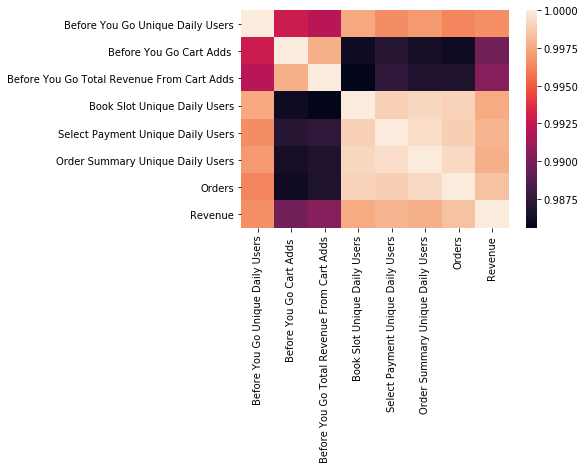

In [5]:
sns.heatmap(data.corr())

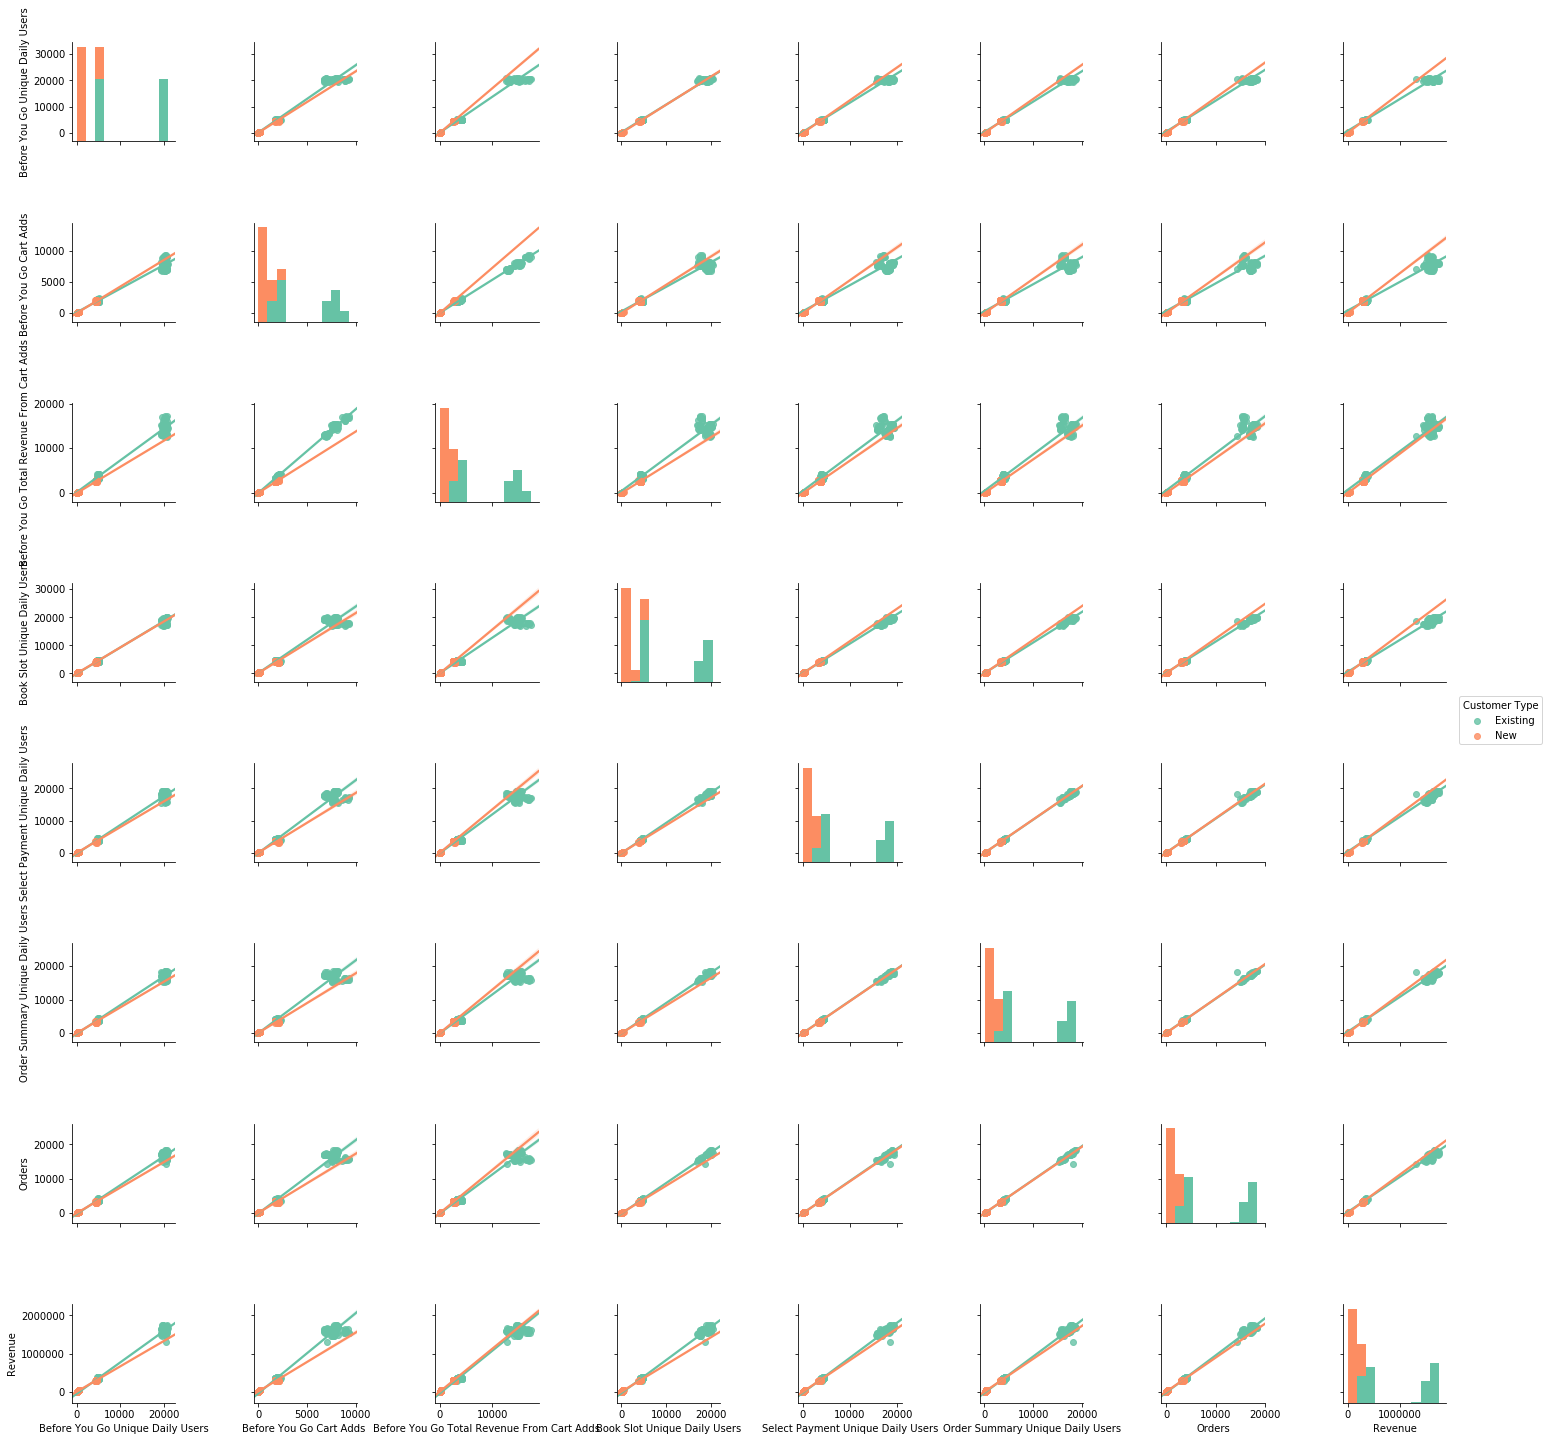

In [6]:
sns.pairplot(data, kind="reg", hue ='Customer Type', palette="Set2")
#plt.show()


In [7]:
groupdata1 = data.groupby(['Customer Type', 'Delivery Type', 'Device Type'])

grouped_revenue = groupdata1['Revenue']
group1 = grouped_revenue.agg('mean')
group1

Customer Type  Delivery Type     Device Type
Existing       Home Delivery     Desktop        1.658839e+06
                                 Mobile         1.557205e+06
               Store Collection  Desktop        3.635355e+05
                                 Mobile         3.410474e+05
New            Home Delivery     Desktop        2.967722e+05
                                 Mobile         1.761318e+04
               Store Collection  Desktop        3.418928e+04
                                 Mobile         2.899935e+03
Name: Revenue, dtype: float64

In [8]:
nameList = []
for i in ['Existing', 'New']:
    for j in ['Home Delivery', 'Store Collection']:
        for k in ['Desktop', 'Mobile']:
            new = i+'/ '+j+'/ '+k
            nameList.append(new)
            

In [9]:
group1data = {'Type':nameList, 'Revenue':list(group1)} 
  
group1data = pd.DataFrame(group1data) 
  
group1data.sort_values(by='Revenue',ascending=False)

,Type,Revenue
0,Existing/ Home Delivery/ Desktop,1.658839e+06
1,Existing/ Home Delivery/ Mobile,1.557205e+06
2,Existing/ Store Collection/ Desktop,3.635355e+05
3,Existing/ Store Collection/ Mobile,3.410474e+05
4,New/ Home Delivery/ Desktop,2.967722e+05
6,New/ Store Collection/ Desktop,3.418928e+04
5,New/ Home Delivery/ Mobile,1.761318e+04
7,New/ Store Collection/ Mobile,2.899935e+03


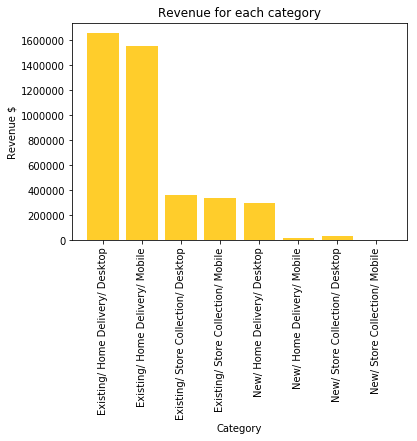

In [10]:
y_pos = np.arange(len(group1data))

plt.bar(y_pos, group1data['Revenue'], color='#ffcd2b')
plt.xticks(y_pos, group1data['Type'],rotation = 90)
plt.title('Revenue for each category')
plt.xlabel('Category')
plt.ylabel('Revenue $')

plt.show()

In [11]:
groupdata2 = data.groupby(['Customer Type'])

grouped_revenue = groupdata2['Revenue']
group2 = grouped_revenue.agg('mean')
group2

Customer Type
Existing    980156.742333
New          87868.653833
Name: Revenue, dtype: float64

In [12]:
(group2[0]-group2[1])/group2[1]*100

1015.4794111133938

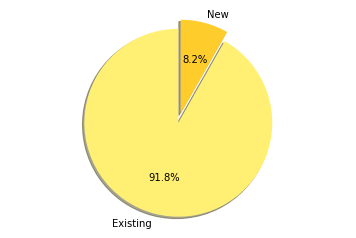

In [168]:
labels = 'Existing', 'New'
sizes = group2
explode = (0, 0.1)
colors = ['#FFF073','#ffcd2b']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

In [13]:
groupdata3 = data.groupby(['Delivery Type'])

grouped_revenue = groupdata3['Revenue']
group3 = grouped_revenue.agg('mean')
group3

Delivery Type
Home Delivery       882607.362500
Store Collection    185418.033667
Name: Revenue, dtype: float64

In [14]:
(group3[0]-group3[1])/group3[1]*100

376.0094501307774

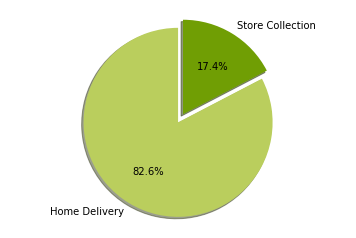

In [167]:
labels = 'Home Delivery', 'Store Collection'
sizes = group3
explode = (0, 0.1)
colors = ['#BACE5D','#709E04']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

In [15]:
groupdata4 = data.groupby(['Device Type'])

grouped_revenue = groupdata4['Revenue']
group4 = grouped_revenue.agg('mean')
group4

Device Type
Desktop     588333.977833
Mobile      479691.418333
Name: Revenue, dtype: float64

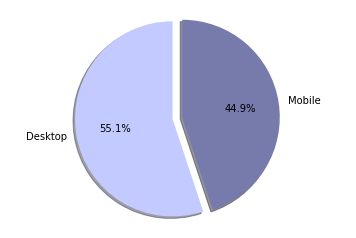

In [169]:
labels = 'Desktop', 'Mobile'
sizes = group4
explode = (0, 0.1)
colors = ['#C2CAFF','#777BAC']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

In [116]:
groupdata5 = data.groupby(['Date'])

grouped_revenue = groupdata5['Revenue']
group5 = grouped_revenue.agg('sum')
group5

Date
2017-09-01    4368428.00
2017-09-02    4438806.00
2017-09-03    4369706.00
2017-09-04    4405118.00
2017-09-05    4465178.00
2017-09-06    3972319.00
2017-09-07    4311260.00
2017-09-08    4314674.00
2017-09-09    4282532.00
2017-09-10    4382259.00
2017-09-11    4377062.00
2017-09-12    4382776.00
2017-09-13    4435789.00
2017-09-14    4461424.00
2017-09-15    4467303.00
2017-09-16    4444834.00
2017-09-17    4315827.00
2017-09-18    4356647.00
2017-09-19    4296468.00
2017-09-20    4311987.00
2017-09-21    4099532.70
2017-09-22    4138315.22
2017-09-23    4177125.94
2017-09-24    4041436.00
2017-09-25    4084194.72
2017-09-26    4009006.94
2017-09-27    4071980.36
2017-09-28    4041125.80
2017-09-29    4173774.84
2017-09-30    4166158.02
Name: Revenue, dtype: float64

Text(0,0.5,'Total Revenue $')

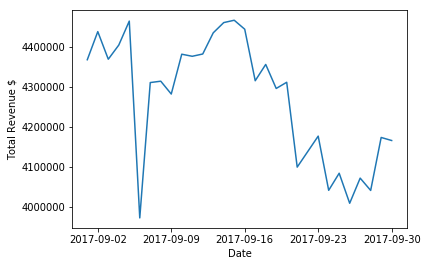

In [120]:
plt.plot(group5)
plt.xlabel('Date')
plt.ylabel('Total Revenue $')

In [94]:
data['tempIndex'] = data['Customer Type'].astype(str)+data['Delivery Type'].astype(str)+data['Device Type'].astype(str)

In [103]:
df1 = data.drop(['Customer Type','Delivery Type', 'Device Type'], axis = 1)
df1.head(10)

,Date,Before You Go Unique Daily Users,Before You Go Cart Adds,Before You Go Total Revenue From Cart Adds,Book Slot Unique Daily Users,Select Payment Unique Daily Users,Order Summary Unique Daily Users,Orders,Revenue,tempIndex
0,2017-09-01,4910,1929,3737,4839,4342,4245,4037,379289.0,ExistingStore CollectionDesktop
1,2017-09-01,4450,1753,2470,4166,3608,3504,3450,311501.0,NewHome DeliveryDesktop
2,2017-09-01,487,148,257,478,452,435,399,36074.0,NewStore CollectionDesktop
3,2017-09-01,398,103,153,343,272,261,250,17452.0,NewHome DeliveryMobile
4,2017-09-01,5159,1750,3356,4785,4242,4059,3855,360265.0,ExistingStore CollectionMobile
5,2017-09-01,20008,7045,13190,18655,18014,17221,17027,1608022.0,ExistingHome DeliveryMobile
6,2017-09-01,20647,7762,15198,19739,19157,18058,17673,1652713.0,ExistingHome DeliveryDesktop
7,2017-09-01,59,15,20,52,50,46,43,3112.0,NewStore CollectionMobile
8,2017-09-02,5022,1788,3194,4828,4058,3854,3800,350621.0,ExistingStore CollectionMobile
9,2017-09-02,20362,8168,15373,19382,18631,18446,18023,1711522.0,ExistingHome DeliveryDesktop


In [96]:
nameList = []
for i in ['Existing', 'New']:
    for j in ['Home Delivery', 'Store Collection']:
        for k in ['Desktop ', 'Mobile']:
            new = i+j+k
            nameList.append(new)

In [101]:
preplot = []
for i in nameList:
    yes = df1['tempIndex'] == i
    newone = df1[yes]
    newone = newone.sort_values(by=['Date']).reset_index(drop=True)
    preplot.append(newone)
    

Text(0,0.5,'Revenue $')

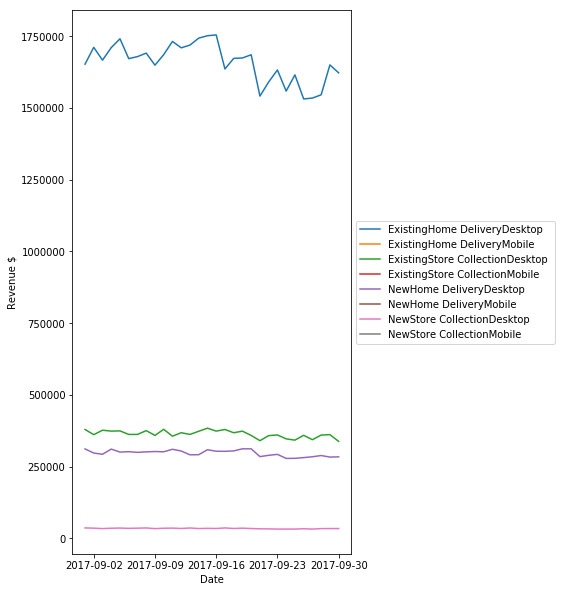

In [171]:
j = 0
plt.figure(figsize=(5,10))
for i in preplot:
    plt.plot(i['Date'],i['Revenue'], label = nameList[j])
    j += 1
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Date')
plt.ylabel('Revenue $')

In [146]:
df2 = data
df2['Revenue From Cart Adds/ Revenue'] = df2['Before You Go Total Revenue From Cart Adds']/df2['Revenue']
df2['After Book Slot Unique Daily Users Loss']  = (df2['Before You Go Unique Daily Users']-df2['Book Slot Unique Daily Users'])/df2['Before You Go Unique Daily Users']
df2['After Select Payment Unique Daily Users Loss']  = (df2['Book Slot Unique Daily Users']-df2['Select Payment Unique Daily Users'])/df2['Before You Go Unique Daily Users']
df2['After Order Summary Unique Daily Users Loss']  = (df2['Select Payment Unique Daily Users']-df2['Order Summary Unique Daily Users'])/df2['Before You Go Unique Daily Users']
df2['After Orders Loss']  = (df2['Order Summary Unique Daily Users']-df2['Orders'])/df2['Before You Go Unique Daily Users']
df2 = df2.drop(['Before You Go Unique Daily Users', 'Before You Go Cart Adds ','Before You Go Total Revenue From Cart Adds',
          'Book Slot Unique Daily Users','Select Payment Unique Daily Users','Order Summary Unique Daily Users','Orders','tempIndex'],axis = 1)

In [148]:
groupdf6 = df2.groupby(['Customer Type', 'Delivery Type', 'Device Type'])

grouped = groupdf6
group6 = grouped.agg('mean')
group6

Revenue  \
Customer Type Delivery Type    Device Type                 
Existing      Home Delivery    Desktop      1.658839e+06   
                               Mobile       1.557205e+06   
              Store Collection Desktop      3.635355e+05   
                               Mobile       3.410474e+05   
New           Home Delivery    Desktop      2.967722e+05   
                               Mobile       1.761318e+04   
              Store Collection Desktop      3.418928e+04   
                               Mobile       2.899935e+03   

                                            Revenue From Cart Adds/ Revenue  \
Customer Type Delivery Type    Device Type                                    
Existing      Home Delivery    Desktop                             0.009410   
                               Mobile                              0.008738   
              Store Collection Desktop                             0.010820   
                               Mobile                              0.010182   
New           Home Delivery    Desktop                             0.008786   
                               Mobile                              0.008831   
              Store Collection Desktop                             0.007933   
                               Mobile                              0.007287   

                                            After Book Slot Unique Daily Users Loss  \
Customer Type Delivery Type    Device Type                                            
Existing      Home Delivery    Desktop                                     0.068491   
                               Mobile                                      0.074040   
              Store Collection Desktop                                     0.087297   
                               Mobile                                      0.099331   
New           Home Delivery    Desktop                                     0.078991   
                               Mobile                                      0.148870   
              Store Collection Desktop                                     0.075999   
                               Mobile                                      0.174255   

                                            After Select Payment Unique Daily Users Loss  \
Customer Type Delivery Type    Device Type                                                 
Existing      Home Delivery    Desktop                                          0.038838   
                               Mobile                                           0.067459   
              Store Collection Desktop                                          0.058311   
                               Mobile                                           0.080499   
New           Home Delivery    Desktop                                          0.124510   
                               Mobile                                           0.171877   
              Store Collection Desktop                                          0.071552   
                               Mobile                                           0.039279   

                                            After Order Summary Unique Daily Users Loss  \
Customer Type Delivery Type    Device Type                                                
Existing      Home Delivery    Desktop                                         0.039456   
                               Mobile                                          0.022555   
              Store Collection Desktop                                         0.025958   
                               Mobile                                          0.028476   
New           Home Delivery    Desktop                                         0.031889   
                               Mobile                                          0.049574   
              Store Collection Desktop                                         0.028259   
                               Mobile         

In [149]:
groupdf7 = df2.groupby(['Customer Type'])

grouped = groupdf7
group6 = grouped.agg('mean')
group6

,Revenue,Revenue From Cart Adds/ Revenue,After Book Slot Unique Daily Users Loss,After Select Payment Unique Daily Users Loss,After Order Summary Unique Daily Users Loss,After Orders Loss
Customer Type,,,,,,
Existing,980156.742333,0.009788,0.082290,0.061277,0.029111,0.023835
New,87868.653833,0.008209,0.119529,0.101804,0.039865,0.042588
